In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '../'
m1d1_rna = sc.read_h5ad(f'{path}/0_preprocess/harmony_pca/m1d1_rna_harmony.h5ad')
out_dir = f"{path}/4_TFactivity/activity_out/"
tf_act_raw = sc.read_h5ad(f'{out_dir}/Mmodel_m1d1_tfactivity.h5ad')
sc.pp.scale(tf_act_raw)

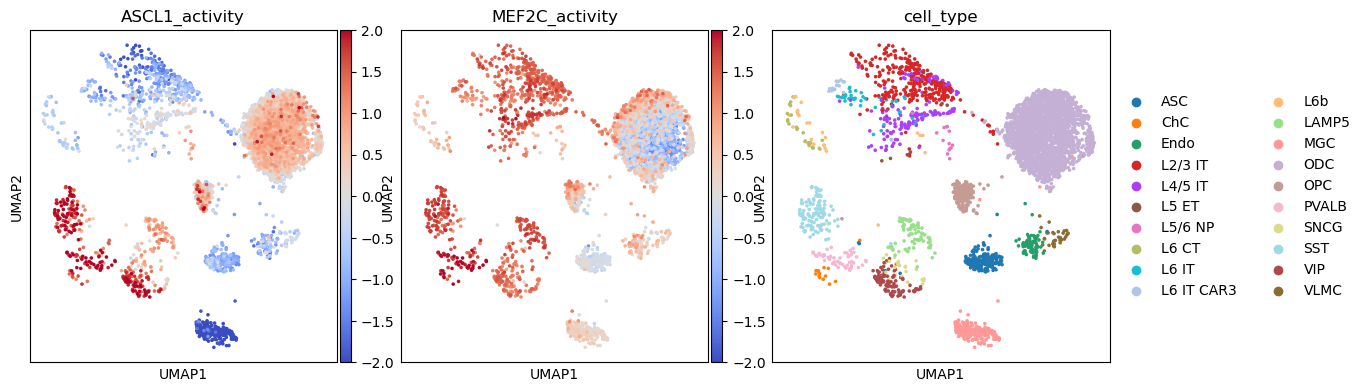

In [3]:
m1ad = tf_act_raw[:,tf_act_raw.var['motif_name']=='ASCL1']
m1d1_rna.obs['ASCL1_activity'] = m1ad.X.flatten()  
m1ad = tf_act_raw[:,tf_act_raw.var['motif_name']=='MEF2C']
m1d1_rna.obs['MEF2C_activity'] = m1ad.X.flatten() 

f, axs = plt.subplots(ncols=3, figsize=(12, 4))
sc.pl.umap(m1d1_rna, color='cell_type', ax=axs[2],show=False)
sc.pl.umap(m1d1_rna, color='ASCL1_activity', ax=axs[0], cmap='coolwarm', vmin=-2, vmax=2,show=False)
sc.pl.umap(m1d1_rna, color='MEF2C_activity', ax=axs[1], cmap='coolwarm', vmin=-2, vmax=2,show=False)
# 调整布局
f.tight_layout(pad=1.0, w_pad=0.5, h_pad=0.5)
f.subplots_adjust(left=0.05, right=0.95, wspace=0.1)
f.show()
# f.savefig(f"{out_dir}/m1d1_ascl1-mef2c_activity.pdf", format="pdf", bbox_inches="tight", dpi=300)